Pandas max function: 8.81
Python max function: nan


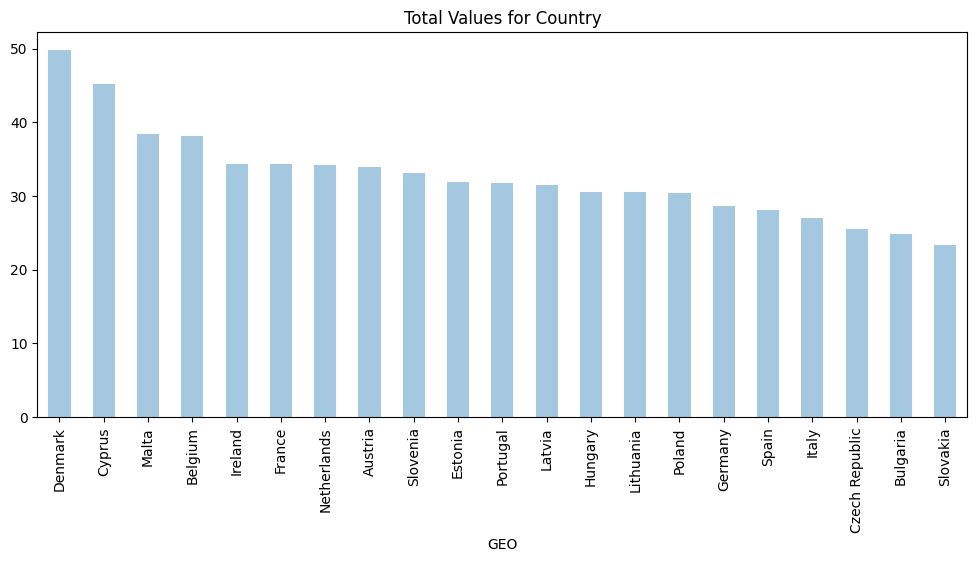

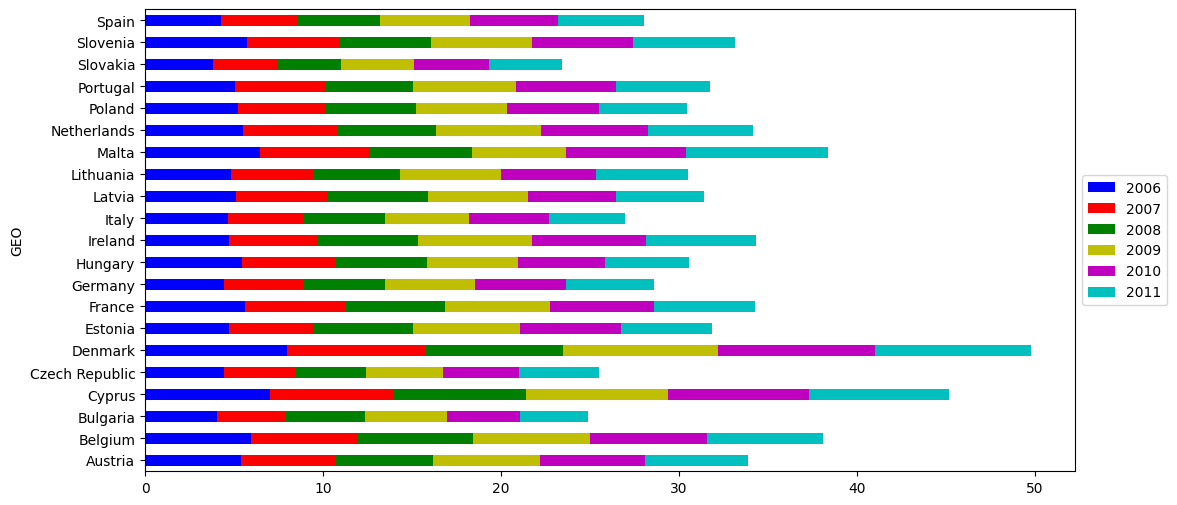

In [26]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
edu = pd.read_csv('educ_figdp_1_Data.csv',
                  na_values=':', usecols=['TIME', 'GEO', 'Value'])
edu
edu.head()
edu.tail()
edu.describe()
edu['Value']
edu[10:14]
edu.loc[90:94,['TIME','GEO']]
edu[edu['Value'] > 6.5].tail()
edu[edu['Value'].isnull()].head()
edu.max(axis=0)
print('Pandas max function:', edu['Value'].max())
print('Python max function:', max(edu['Value']))
s = edu['Value'] / 100
s.head()
s = edu['Value'].apply(np.sqrt)
s.head()
s = edu['Value'].apply(lambda d: d**2)
s.head()
edu['ValueNorm'] = edu['Value'] / edu['Value'].max()
edu.tail()
edu.drop('ValueNorm', axis=1, inplace=True)
edu.head()
edu.drop(max(edu.index), axis=0, inplace=True)
edu.tail()
eduDrop = edu.dropna(how='any', subset=['Value'], axis=0)
eduDrop.head()
eduFilled = edu.fillna(value={'Value': 0})
eduFilled.head()
edu.sort_values(by='Value', ascending=False, inplace=True)
edu.head()
edu.sort_index(axis=0, ascending=True, inplace=True)
edu.head()
group = edu[['GEO', 'Value']].groupby('GEO').mean()
group.head()
filtered_data = edu[edu['TIME'] > 2005]
pivedu = pd.pivot_table(filtered_data, values='Value',
                        index=['GEO'], columns=['TIME'])
pivedu.head()
pivedu.loc[['Spain', 'Portugal'], [2006, 2011]]
pivedu = pivedu.drop(['Euro area (13 countries)',
                      'Euro area (15 countries)',
                      'Euro area (17 countries)',
                      'Euro area (18 countries)',
                      'European Union (25 countries)',
                      'European Union (27 countries)',
                      'European Union (28 countries)'
                      ], axis=0)
pivedu = pivedu.rename(
    index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
pivedu = pivedu.dropna()
pivedu.rank(ascending=False, method='first').head()
totalSum = pivedu.sum(axis=1)
totalSum.rank(ascending=False, method='dense').sort_values().head()
fig = plt.figure(figsize=(12, 5))
totalSum = pivedu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind='bar', style='b', alpha=0.4,
              title='Total Values for Country')
plt.savefig('Totalvalue_Country.png', dpi=300, bbox_inches='tight')
plt.show()
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu.plot(kind='barh', stacked=True, color=my_colors, figsize=(12, 6))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Value_Time_Country.png', dpi=300, bbox_inches='tight')
plt.show()
